<a href="https://colab.research.google.com/github/kebreest/homework/blob/master/Week2_UsingTextAsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Text-as-Data


This is our second interactive Jupyter notebook for running R. In this notebook, we'll starting working with texts. As we discussed in class, there's a huge variance in what counts as a "text", running the gamut from sentences or tweets to entire novels like *War & Peace*. 

In this notebook, you'll learn how to start working with text-as-data in R. That includes storage formats, manipulation, counting, subsetting, and editing of the texts. There's a lot we can do once we have the texts in R!

By the end of this notebook, you should be familiar with the following:

1. Character vectors: `c()`
2. Corpus: `corpus()`, `summary()`
3. Metadata: `docvars()`
4. Subsetting corpora: `corpus_subset()`
5. Number of documents: `ndoc()`
6. Tokenization: `tokens()`
7. Contextual analysis: `kwic()`
8. N-grams: `tokens_ngrams()`




# Front-end Matters

This week, we'll start by looking at the Harry Potter series. First things first, we need to install and load the packages for today's notebook. 


In [ ]:
install.packages("devtools")
install.packages("tidytext")
install.packages("plyr")
install.packages("tidyverse")
install.packages("quanteda")

# load libraries
library(devtools)
devtools::install_github("bradleyboehmke/harrypotter")
library(harrypotter)
library(tidytext)
library(plyr)
library(tidyverse)
library(quanteda)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘rle’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘ISOcodes’, ‘data.table’, ‘extrafont’, ‘fastmatch’, ‘ggrepel’, ‘network’, ‘RcppParallel’, ‘sna’, ‘stopwords’, ‘proxyC’, ‘RcppArmadillo’


Loading required package: usethis




✔  checking for file ‘/tmp/RtmpndS5XS/remotes3d56ff1786/bradleyboehmke-harrypotter-51f7146/DESCRIPTION’
─  preparing ‘harrypotter’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘harrypotter_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Package version: 2.1.2

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘qu

# Character Vectors

The first seven books are now available in our workspace. These are: 
 

1. `philosophers_stone`: Harry Potter and the Philosophers Stone (1997)
2. `chamber_of_secrets`: Harry Potter and the Chamber of Secrets (1998)
3. `prisoner_of_azkaban`: Harry Potter and the Prisoner of Azkaban (1999)
4. `goblet_of_fire`: Harry Potter and the Goblet of Fire (2000)
5. `order_of_the_phoenix`: Harry Potter and the Order of the Phoenix
6. `half_blood_price`: Harry Potter and the Half-Blood Prince (2005)
7. `deathly_hallows`: Harry Potter and the Deathly Hallows (2007)

Each is stored as a **character vector**. A character vector is a collection of elements, where each element is a string. You could creat your own character vector as something like:  

In [ ]:
my_char_vec <- c("Doug's", "dog", "is", "snoring", "loudly.")
print(my_char_vec)


[1] "Doug's"  "dog"     "is"      "snoring" "loudly."


Each element of a vector has an index; starting at 1, count from left-to-right. You can call to particular elements from the character vector using that indexing. So, if I wanted the fourth element from the above, I could type: 

In [ ]:
my_char_vec[4]

[1] "snoring"

In the example, each element was --- essentially --- a single word. However, they don't need to be. Each element can be as long as you like. For instance, a character vector could also be: 

In [ ]:
my_char_vec <- c("Doug's dog is snoring loudly.", "Laughing children wake her up.", "She chases the children down the hall.")
print(my_char_vec)

[1] "Doug's dog is snoring loudly."         
[2] "Laughing children wake her up."        
[3] "She chases the children down the hall."


The storage of the Harry Potter books follows this intuition. Each book is a character vector, and each chapter is an element in that book's character vector. So, for `philosophers_stone`, we can see the first chapter via:

In [ ]:
philosophers_stone[1]

[1] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.　　The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years; in fact, Mrs. Dursley pretended she didn't have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be. The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street. The Dursleys knew that the Potters had a small son, too, but they had never even seen him. This boy was another good reason for keeping the Potters away; they didn't want Dudley mixing with a child like that.　　When Mr. and Mrs. Dursley woke up on the dull, gray Tuesday our story starts, there was nothing about the cloudy sky outside to suggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his most boring tie for work, and Mrs. Dursley gossiped away happily as she wrestled a screaming Dudley into his high chair.　　None of them noticed a large, tawny owl flutter past the window.　　At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls. \"Little tyke,\" chortled Mr. Dursley as he left the house. He got into his car and backed out of number four's drive.　　It was on the corner of the street that he noticed the first sign of something peculiar -- a cat reading a map. For a second, Mr. Dursley didn't realize what he had seen -- then he jerked his head around to look again. There was a tabby cat standing on the corner of Privet Drive, but there wasn't a map in sight. What could he have been thinking of? It must have been a trick of the light. Mr. Dursley blinked and stared at the cat. It stared back. As Mr. Dursley drove around the corner and up the road, he watched the cat in his mirror. It was now reading the sign that said Privet Drive -- no, looking at the sign; cats couldn't read maps or signs. Mr. Dursley gave himself a little shake and put the cat out of his mind. As he drove toward town he thought of nothing except a large order of drills he was hoping to get that day.　　But on the edge of town, drills were driven out of his mind by something else. As he sat in the usual morning traffic jam, he couldn't help noticing that there seemed to be a lot of strangely dressed people about. People in cloaks. Mr. Dursley couldn't bear people who dressed in funny clothes -- the getups you saw on young people! He supposed this was some stupid new fashion. He drummed his fingers on the steering wheel and his eyes fell on a huddle of these weirdos standing quite close by. They were whispering excitedly together. Mr. Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr. Dursley that this was probably some silly stunt -- these people were obviously collecting for something... yes, that would be it. The traffic moved on and a fe

## Corpus
While this is interesting, we want something that's more straightforward to work with. Therefore, we are going to convert the character vectors to a **corpus**. A corpus is a stored collection of texts; we can also store corpus meta-data as a dataframe associated with the corpus. This is particularly helpful when we have document-level covariates that we might want to use in analysis of the texts.  

In [ ]:
philosophers_stone_corpus <- corpus(philosophers_stone)
philosophers_stone_summary <- summary(philosophers_stone_corpus) 
philosophers_stone_summary

,Text,Types,Tokens,Sentences
,<chr>,<int>,<int>,<int>
1,text1,1273,5643,349
2,text2,1067,4128,237
3,text3,1226,4630,297
4,text4,1198,4761,321
5,text5,1820,8372,563
6,text6,1567,7949,566
7,text7,1379,5445,351
8,text8,1096,3594,198
9,text9,1426,6131,410


Notice that each element from the character vector has been treated as a unique text; that is, each chapter is being treated as a separate text. The `summary()` function provides a breakdown of some basic statistics on each chapter then. `Text` is an automatically created unique identifier for each text, `Types` is the number of unique words/tokens in the text, `Tokens` is the total number of words/tokens in the text (i.e., the length of the chapter), and `Sentences` is the number of sentences in the chapter. 

# Metadata

For each book, we don't have much in the way of metadata. However, this summary gives us a start and is something we can use to add metadata to the corpus we've created. 

In [ ]:
# check for metadata; shouldn't see any
docvars(philosophers_stone_corpus)

# add an indicator for the book; this will be useful later when we add 
# all the books together into a single corpus
philosophers_stone_summary$book <- "Philosopher's Stone"
philosophers_stone_summary

# create a chapter indicator
philosophers_stone_summary$chapter <- as.numeric(str_extract(philosophers_stone_summary$Text, "[0-9]+"))
philosophers_stone_summary

1 
2 
3 
4 
5 
6 
7 
8 
9 
10
11
12
13
14
15
16
17

,Text,Types,Tokens,Sentences,book
,<chr>,<int>,<int>,<int>,<chr>
1,text1,1273,5643,349,Philosopher's Stone
2,text2,1067,4128,237,Philosopher's Stone
3,text3,1226,4630,297,Philosopher's Stone
4,text4,1198,4761,321,Philosopher's Stone
5,text5,1820,8372,563,Philosopher's Stone
6,text6,1567,7949,566,Philosopher's Stone
7,text7,1379,5445,351,Philosopher's Stone
8,text8,1096,3594,198,Philosopher's Stone
9,text9,1426,6131,410,Philosopher's Stone


,Text,Types,Tokens,Sentences,book,chapter
,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,text1,1273,5643,349,Philosopher's Stone,1
2,text2,1067,4128,237,Philosopher's Stone,2
3,text3,1226,4630,297,Philosopher's Stone,3
4,text4,1198,4761,321,Philosopher's Stone,4
5,text5,1820,8372,563,Philosopher's Stone,5
6,text6,1567,7949,566,Philosopher's Stone,6
7,text7,1379,5445,351,Philosopher's Stone,7
8,text8,1096,3594,198,Philosopher's Stone,8
9,text9,1426,6131,410,Philosopher's Stone,9


Now we can assign these to the corpus as document-level metadata as follows:

In [ ]:
docvars(philosophers_stone_corpus) <- philosophers_stone_summary
docvars(philosophers_stone_corpus)


Text,Types,Tokens,Sentences,book,chapter
<chr>,<int>,<int>,<int>,<chr>,<dbl>
text1,1273,5643,349,Philosopher's Stone,1
text2,1067,4128,237,Philosopher's Stone,2
text3,1226,4630,297,Philosopher's Stone,3
text4,1198,4761,321,Philosopher's Stone,4
text5,1820,8372,563,Philosopher's Stone,5
text6,1567,7949,566,Philosopher's Stone,6
text7,1379,5445,351,Philosopher's Stone,7
text8,1096,3594,198,Philosopher's Stone,8
text9,1426,6131,410,Philosopher's Stone,9


These document variables can be really useful when we want to subset the corpus to some specific level. With just one book, it doesn't make a lot of sense to subset right now. But the intuition works later, so let's look at what we'd do if we wanted to, say, look at only chapters with fewer than 5,000 tokens. 

In [ ]:
small_corpus <- corpus_subset(philosophers_stone_corpus, Tokens < 5000)
summary(small_corpus)

,Text,Types,Tokens,Sentences,Text,Types,Tokens,Sentences,book,chapter
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,text2,1067,4128,237,text2,1067,4128,237,Philosopher's Stone,2
2,text3,1226,4630,297,text3,1226,4630,297,Philosopher's Stone,3
3,text4,1198,4761,321,text4,1198,4761,321,Philosopher's Stone,4
4,text8,1096,3594,198,text8,1096,3594,198,Philosopher's Stone,8
5,text11,1113,4152,276,text11,1113,4152,276,Philosopher's Stone,11
6,text13,1078,3930,261,text13,1078,3930,261,Philosopher's Stone,13
7,text14,1112,4354,308,text14,1112,4354,308,Philosopher's Stone,14


Chapters offer a natural unit for analysis here. However, we may want to reshape the level of analysis that we are conducting, perhaps moving from the chapter level to the paragraph or sentence level. 

In [ ]:
# the number of documents (chapters) in our small corpus
ndoc(small_corpus)

# the command to reshape our corpus to the sentence level
small_corpus_sentences <- corpus_reshape(small_corpus, to = "sentences")

# the number of documents (sentences) in our reshaped corpus
ndoc(small_corpus_sentences)

# a summary of the first 5 texts in the sentence-level corpus
summary(small_corpus_sentences, n=5)

[1] 7

[1] 1898

,Text,Types,Tokens,Sentences,Text,Types,Tokens,Sentences,book,chapter
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,text2.1,29,32,1,text2,1067,4128,237,Philosopher's Stone,2
2,text2.2,45,57,1,text2,1067,4128,237,Philosopher's Stone,2
3,text2.3,13,14,1,text2,1067,4128,237,Philosopher's Stone,2
4,text2.4,55,69,1,text2,1067,4128,237,Philosopher's Stone,2
5,text2.5,17,17,1,text2,1067,4128,237,Philosopher's Stone,2


So we have gone from 7 documents (chapters) to 1,898 documents (sentences). The summary provides some unique new information for us now. The first four columns now relate to summary items for the sentence level (which is why Sentences is always equal to 1) and the next four columns relate to the document. Note that the first Text column now includes an additional term (i.e., ``.1''). These index each sentence within the chapter. 

The "right" level of analysis is going to be really contingent on your specific research question. *There is no single correct level of analysis across all analyses.* Think -- a lot -- about what you are interested in studying, and what level is best for that study.

## Tokens

We've used the phrase "tokens" in a few places now, and it's time to dive into what we mean by it. Tokens are the individual component pieces of the text, and tokenizng is the process of breaking up the text into those component pieces. Consider the following tweet from President Trump:

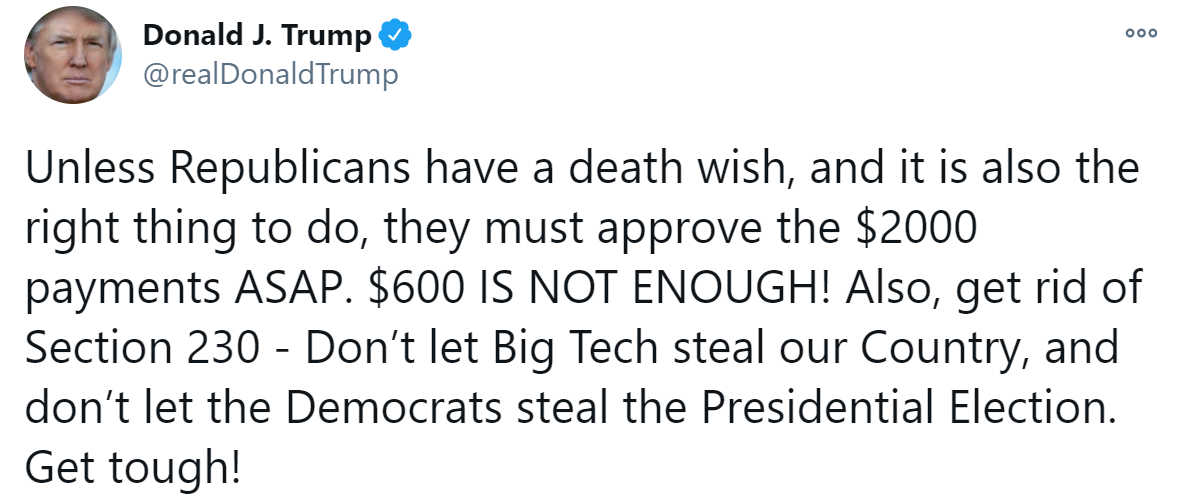


We can start to break that into constituent words ("Unless", "Republicans", etc.) but notice that we pretty quickly have decisions to make. Should we include the punctuation marks (",", ".", "!") with a word? As unique tokens themselves? What about numbers like 2000? Likewise, we have to decide whether to include the "\$" with 2000; you can see why that'd be important when you get a bit further and run into "Section 230". Finally, what should we do with contractions like "Don't"? Is that one word or two? And should we treat "Don't" and "don't" as the same token, or two different tokens?

All of these are choices that get nested into the tokenization process. The most basic versions of a tokenizer will split on white space; others are trained to split on a host of other characteristics. The big thing to know is to always *look at the data you are creating*.  

In [ ]:
# the default breaks on white space
philosophers_stone_tokens <- tokens(philosophers_stone_corpus)
print(philosophers_stone_tokens)

# you can also drop punctuation
philosophers_stone_tokens <- tokens(philosophers_stone_corpus, 
    remove_punct = T)
print(philosophers_stone_tokens)

# as well as numbers
philosophers_stone_tokens <- tokens(philosophers_stone_corpus, 
    remove_punct = T,
    remove_numbers = T)
print(philosophers_stone_tokens)


Tokens consisting of 17 documents and 6 docvars.
text1 :
 [1] "THE"     "BOY"     "WHO"     "LIVED"   "Mr"      "."       "and"    
 [8] "Mrs"     "."       "Dursley" ","       "of"     
[ ... and 5,631 more ]

text2 :
 [1] "THE"       "VANISHING" "GLASS"     "Nearly"    "ten"       "years"    
 [7] "had"       "passed"    "since"     "the"       "Dursleys"  "had"      
[ ... and 4,116 more ]

text3 :
 [1] "THE"         "LETTERS"     "FROM"        "NO"          "ONE"        
 [6] "The"         "escape"      "of"          "the"         "Brazilian"  
[11] "boa"         "constrictor"
[ ... and 4,618 more ]

text4 :
 [1] "THE"     "KEEPER"  "OF"      "THE"     "KEYS"    "BOOM"    "."      
 [8] "They"    "knocked" "again"   "."       "Dudley" 
[ ... and 4,749 more ]

text5 :
 [1] "DIAGON"   "ALLEY"    "Harry"    "woke"     "early"    "the"     
 [7] "next"     "morning"  "."        "Although" "he"       "could"   
[ ... and 8,360 more ]

text6 :
 [1] "THE"            "JOURNEY"        "FROM

When the data are tokenized, we can start to look at a more granular level at the usage of particular terms. For instance, maybe we want to know about the usage of particular terms within the corpus. We can look at that using **k**ey**w**ord-**i**n-**c**ontext (`kwic`).  

In [ ]:
# check the use of "dumbledore"
kwic_dumbledore <- kwic(philosophers_stone_tokens, 
      pattern = c("dumbledore"))

# look at the first few uses
head(kwic_dumbledore)

# now look at a broader window of terms around "dumbledore"
kwic_dumbledore <- kwic(philosophers_stone_tokens, 
      pattern = c("dumbledore"),
      window = 10)

# look at the first few uses
head(kwic_dumbledore)

# if you are more interested in phrases, then you can do that too using phrase()
kwic_phrase <- kwic(philosophers_stone_tokens,
      pattern = phrase("daily prophet"))
head(kwic_phrase)


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text6,4448,4448,it will be enough I'm,Hermione,Granger by the way who,hermione
2,text6,4499,4499,Harry Are you really said,Hermione,I know all about you,hermione
3,text6,4561,4561,if it was me said,Hermione,Do either of you know,hermione
4,text6,5024,5024,Neville the toadless boy or,Hermione,Granger this time Three boys,hermione
5,text6,5483,5483,footsteps because a second later,Hermione,Granger had come in What,hermione
6,text6,5602,5602,Dark Side He turned to,Hermione,Can we help you with,hermione


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text1,2244,2244,been broken at least twice This man's name was Albus,Dumbledore,Albus Dumbledore didn't seem to realize that he had just,dumbledore
2,text1,2246,2246,at least twice This man's name was Albus Dumbledore Albus,Dumbledore,didn't seem to realize that he had just arrived in,dumbledore
3,text1,2439,2439,to see anything that was happening down on the pavement,Dumbledore,slipped the Put-Outer back inside his cloak and set off,dumbledore
4,text1,2691,2691,He never had much sense You can't blame them said,Dumbledore,gently We've had precious little to celebrate for eleven years,dumbledore
5,text1,2744,2744,clothes swapping rumors She threw a sharp sideways glance at,Dumbledore,here as though hoping he was going to tell her,dumbledore
6,text1,2794,2794,out about us all I suppose he really has gone,Dumbledore,It certainly seems so said Dumbledore We have much to,dumbledore


,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text5,830,831,Hagrid read his newspaper the,Daily Prophet,Harry had learned from Uncle,daily prophet
2,text6,4809,4810,It's been all over the,Daily Prophet,but I don't suppose you,daily prophet
3,text8,2807,2808,was a cutting from the,Daily Prophet,GRINGOTTS BREAK-IN LATEST Investigations continue,daily prophet


The *Daily Prophet* offers a great example of a problem we might encounter with tokenizers; the standard approach is going to treat this as two different words when really it is the phrase itself that is likely of interest. Therefore, we can compound the tokens into a phrase using `tokens_compound()`. This creates a *bigram*; you can similarly create three-token phrases (*trigram*), four-token phrases (*four-gram*), and so on. Note that the newly created token will be the phrase separated by "_" (i.e., `Daily_Prophet`). 

In [ ]:
philosophers_stone_compound <- tokens_compound(philosophers_stone_tokens,
    pattern = phrase("Daily Prophet"))

head(kwic(philosophers_stone_compound, pattern = "Daily_Prophet"))

,docname,from,to,pre,keyword,post,pattern
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,text5,830,830,Hagrid read his newspaper the,Daily_Prophet,Harry had learned from Uncle,Daily_Prophet
2,text6,4809,4809,It's been all over the,Daily_Prophet,but I don't suppose you,Daily_Prophet
3,text8,2807,2807,was a cutting from the,Daily_Prophet,GRINGOTTS BREAK-IN LATEST Investigations continue,Daily_Prophet


Of course, you may also believe that there are lots and lots of potentially meaningful n-grams (i.e., uni-, bi-, tri-, four-, etc.) that you do not want to individually specify. In those cases, you can specify that tokenization specifically include **every** possible n-gram. 

In [ ]:
# create a tokens object with unigrams and bigrams
philosophers_stone_ngrams <- tokens_ngrams(philosophers_stone_tokens, n=1:2)

# look at the first few observations. Note the indexing here to look at only 
# the first few words *within the first chapter*
head(philosophers_stone_ngrams[[1]], 20)


[1] "THE"     "BOY"     "WHO"     "LIVED"   "Mr"      "and"     "Mrs"    
 [8] "Dursley" "of"      "number"  "four"    "Privet"  "Drive"   "were"   
[15] "proud"   "to"      "say"     "that"    "they"    "were"

In [ ]:
tail(philosophers_stone_ngrams[[1]], 20)

[1] "all_over"      "over_the"      "the_country"   "country_were" 
 [5] "were_holding"  "holding_up"    "up_their"      "their_glasses"
 [9] "glasses_and"   "and_saying"    "saying_in"     "in_hushed"    
[13] "hushed_voices" "voices_To"     "To_Harry"      "Harry_Potter" 
[17] "Potter_the"    "the_boy"       "boy_who"       "who_lived"

As you can see, there is a pretty severe curse of dimensionality problem as you look to expand into greater and greater ngrams. Nevertheless, computational time and space is cheap, and the added information from the phrases could be useful in different research settings.

## Combining Corpora

In the above, we've been working with just one text, broken into chapters. But occassionally we have two corpora that we need to combine. Here, for instance, the `harrypotter` package has also provided an additional 6 books that we have not, to this point, added to any of our analysis. 

Doing so with `quanteda` is easy, but getting there is hard because we have to repeat a lot of steps for seven corpora. Instead, let's do this with *loops*. 

In [ ]:
# list out the object (book) names that we need
myBooks <- c("philosophers_stone", "chamber_of_secrets", "prisoner_of_azkaban", "goblet_of_fire", "order_of_the_phoenix", 
  "half_blood_prince", "deathly_hallows")

# create loop.
for (i in 1:length(myBooks)){
  
  # create corpora
  corpusCall <- paste(myBooks[i],"_corpus <- corpus(",myBooks[i],")", sep = "")
  eval(parse(text=corpusCall))

  # change document names for each chapter to include the book title. If you don't do this, the document names will be duplicated and you'll get an error.
  namesCall <- paste("tmpNames <- docnames(",myBooks[i],"_corpus)", sep = "")
  eval(parse(text=namesCall))
  bindCall <- paste("docnames(",myBooks[i],"_corpus) <- paste(\"",myBooks[i],"\", tmpNames, sep = \"-\")", sep = "")
  eval(parse(text=bindCall))

  # create summary data
  summaryCall <- paste(myBooks[i],"_summary <- summary(",myBooks[i],"_corpus)", sep = "")
  eval(parse(text=summaryCall))

  # add indicator
  bookCall <- paste(myBooks[i],"_summary$book <- \"",myBooks[i],"\"", sep = "")
  eval(parse(text=bookCall))

  # add chapter indicator
  chapterCall <- paste(myBooks[i],"_summary$chapter <- as.numeric(str_extract(",myBooks[i],"_summary$Text, \"[0-9]+\"))", sep = "")
  eval(parse(text=chapterCall))

  # add meta data to each corpus
  metaCall <- paste("docvars(",myBooks[i],"_corpus) <- ",myBooks[i],"_summary", sep = "")
  eval(parse(text=metaCall))

}

# once the loop finishes up, check to make sure you've created what you want
docvars(deathly_hallows_corpus)


Text,Types,Tokens,Sentences,book,chapter
<chr>,<int>,<int>,<int>,<chr>,<dbl>
deathly_hallows-text1,1108,3876,223,deathly_hallows,1
deathly_hallows-text2,1466,4614,163,deathly_hallows,2
deathly_hallows-text3,1110,4171,256,deathly_hallows,3
deathly_hallows-text4,1549,6586,307,deathly_hallows,4
deathly_hallows-text5,1577,7604,488,deathly_hallows,5
deathly_hallows-text6,1772,8389,481,deathly_hallows,6
deathly_hallows-text7,1810,8457,533,deathly_hallows,7
deathly_hallows-text8,1862,7758,435,deathly_hallows,8
deathly_hallows-text9,1288,5198,278,deathly_hallows,9


Now that we have all of the corpora in order, we can combine them using `c()`.


In [ ]:
# create combined corpora of the first 7 Harry Potter books.
harry_potter_corpus <- c(philosophers_stone_corpus, chamber_of_secrets_corpus, prisoner_of_azkaban_corpus, goblet_of_fire_corpus, order_of_the_phoenix_corpus, 
  half_blood_prince_corpus, deathly_hallows_corpus)
summary(harry_potter_corpus)


,Text,Types,Tokens,Sentences,Text,Types,Tokens,Sentences,book,chapter
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,philosophers_stone-text1,1273,5643,349,philosophers_stone-text1,1273,5643,349,philosophers_stone,1
2,philosophers_stone-text2,1067,4128,237,philosophers_stone-text2,1067,4128,237,philosophers_stone,2
3,philosophers_stone-text3,1226,4630,297,philosophers_stone-text3,1226,4630,297,philosophers_stone,3
4,philosophers_stone-text4,1198,4761,321,philosophers_stone-text4,1198,4761,321,philosophers_stone,4
5,philosophers_stone-text5,1820,8372,563,philosophers_stone-text5,1820,8372,563,philosophers_stone,5
6,philosophers_stone-text6,1567,7949,566,philosophers_stone-text6,1567,7949,566,philosophers_stone,6
7,philosophers_stone-text7,1379,5445,351,philosophers_stone-text7,1379,5445,351,philosophers_stone,7
8,philosophers_stone-text8,1096,3594,198,philosophers_stone-text8,1096,3594,198,philosophers_stone,8
9,philosophers_stone-text9,1426,6131,410,philosophers_stone-text9,1426,6131,410,philosophers_stone,9


Now we're cooking. Here are some handy summary functions that can help us get a handle of the size and scope of our corpus now that we're not going to be able to quickly see everything even in a summary page.

In [ ]:
# check the number of documents (here, total chapters in the 7 books)
ndoc(harry_potter_corpus)

# check the total length of the text (i.e., the total word count)
sum(ntoken(harry_potter_corpus))


[1] 200

[1] 10955

We'll learn other ways to characterize and explore the texts later this semester when we turn to the different manners in which we present them. For now, you should have all of the tools you need to get your own corpus set up in R, and to be able to identify a number of important characteristics (the size of the corpus in terms of documents and vocabulary, for instance). 